### CASE STUDY: DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR  INSURANCE CLAIMS DATA

### Import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Problem No. 1: 

### Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions. 

In [2]:
claims_data = pd.read_csv('claims.csv')
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [4]:
claims_data.shape

(1100, 10)

In [5]:
cust_data = pd.read_csv('cust_demographics.csv')
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null object
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [7]:
cust_data.shape

(1085, 6)

In [8]:
insurance_claims = pd.merge(left = claims_data, right = cust_data, left_on = 'customer_id', right_on = 'CUST_ID', how = 'inner')

In [9]:
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [10]:
insurance_claims.shape

(1085, 16)

In [11]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 144.1+ KB


In [12]:
insurance_claims.drop('CUST_ID', axis = 1, inplace = True)

In [13]:
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


### Problem No. 2:

### Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance. 

In [14]:
#Data Audit:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 135.6+ KB


### NOTE: As per above Data Audit report datatype of 'claim_amount'  is object which in terms of business perspective is insignificant.

### Problem No. 3:

### Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [15]:
insurance_claims['claim_amount'] = insurance_claims['claim_amount'].replace({'\$':''}, regex = True)
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


In [16]:
insurance_claims['claim_amount'] = pd.to_numeric(insurance_claims['claim_amount'])
insurance_claims.claim_amount.dtype

dtype('float64')

In [17]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 135.6+ KB


### Problem No. 4:

### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims. 

In [18]:
insurance_claims.loc[(insurance_claims.claim_type == 'Injury only')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
8,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,Male,17-May-77,NH,419-712-8513,Gold
18,67257404,18288638,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,Female,14-Jan-69,MI,314-135-1359,Platinum
21,7809917,63916778,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,Male,07-Sep-66,IL,146-157-4572,Platinum
22,29205389,17004138,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No,Female,13-Aug-65,WA,436-354-4682,Silver
23,19051665,9667764,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No,Female,10-Oct-79,SC,643-978-8251,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,85546357,90217818,Other driver error,06/04/2017,Auto,No,Injury only,37743.0,1.0,Yes,Female,18-May-80,TN,891-651-8671,Gold
1064,56358443,75934330,Natural causes,01/01/2017,Auto,Yes,Injury only,20630.0,1.0,No,Female,09-Oct-87,ME,951-941-3975,Platinum
1072,50800999,51669975,Other causes,09/19/2018,Home,Yes,Injury only,38950.0,1.0,No,Female,05-Feb-88,ND,975-463-9541,Silver
1074,36599575,87596868,Driver error,10/09/2018,Auto,Unknown,Injury only,33330.0,2.0,No,Male,18-Nov-61,AZ,573-396-3182,Silver


In [19]:
insurance_claims['alert_flag'] = 0
insurance_claims.loc[(insurance_claims['claim_type'] == 'Injury only') & (insurance_claims['police_report'] == 'No') , 'alert_flag'] = 1
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,0


### Problem No. 5:

### One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [20]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0


In [21]:
# For identification of duplicate records.
insurance_claims[insurance_claims.customer_id.duplicated()]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,Male,13-May-77,NV,956-871-8691,Gold,0
9,91475471,21831191,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,17-May-77,NH,419-712-8513,Gold,0
608,78221963,84147585,Driver error,04/10/2018,Auto,Yes,Injury only,14430.0,4.0,No,Male,18-Oct-72,AK,743-569-4783,Gold,0
610,1654201,85357756,Driver error,06/23/2018,Auto,Unknown,Material only,2510.0,1.0,No,Male,02-Jan-70,PA,915-698-3649,Platinum,0
612,41779510,53539195,Driver error,10/03/2018,Home,No,Injury only,25040.0,1.0,No,Male,02-Oct-89,NV,914-342-8239,Gold,1


In [22]:
# For removing the duplicate records as identified above.
insurance_claims.drop_duplicates(subset = 'customer_id', keep = 'first',inplace = True)
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,0


### Problem No. 6:

###  Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical) 

In [23]:
# For identifying the columns with missing values.
round((1- insurance_claims.count()/insurance_claims.shape[0])*100, 1)

claim_id               0.0
customer_id            0.0
incident_cause         0.0
claim_date             0.0
claim_area             0.0
police_report          0.0
claim_type             0.0
claim_amount           6.0
total_policy_claims    0.9
fraudulent             0.0
gender                 0.0
DateOfBirth            0.0
State                  0.0
Contact                0.0
Segment                0.0
alert_flag             0.0
dtype: float64

In [24]:
insurance_claims.claim_amount.dtype

dtype('float64')

In [25]:
insurance_claims.total_policy_claims.dtype

dtype('float64')

In [26]:
# Since both the columns with missing values are of datatype float64. 
# So we will replace them with mean values of respective column values.

In [27]:
insurance_claims.claim_amount.mean()

12470.498519249753

In [28]:
insurance_claims['claim_amount'] = insurance_claims['claim_amount'].fillna(insurance_claims.claim_amount.mean())
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,0


In [29]:
insurance_claims.total_policy_claims.mean()

1.5823970037453183

In [30]:
insurance_claims['total_policy_claims'] = insurance_claims['total_policy_claims'].fillna(insurance_claims.total_policy_claims.mean())
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver,0
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,13-May-77,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver,0


### Problem No. 7:

### Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:
Children < 18 Youth 18-30 Adult 30-60 Senior > 60 

In [31]:
now = pd.to_datetime('now')
now

Timestamp('2020-02-09 10:25:22.887059')

In [32]:
insurance_claims.DateOfBirth.dtype

dtype('O')

In [33]:
insurance_claims['DateOfBirth'] = pd.to_datetime(insurance_claims['DateOfBirth'], format = '%d-%b-%y')
insurance_claims.DateOfBirth.dtype

dtype('<M8[ns]')

In [34]:
insurance_claims['DateOfBirth'] = insurance_claims['DateOfBirth'].where(insurance_claims['DateOfBirth'] < now, insurance_claims['DateOfBirth'] -  np.timedelta64(100, 'Y'))
insurance_claims['age'] = (now - insurance_claims['DateOfBirth']).astype('<m8[Y]')
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,0,41.0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0,50.0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,0,35.0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,33.0
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15 00:00:00,ND,459-425-4319,Platinum,0,38.0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07 00:00:00,ID,529-462-1635,Silver,0,23.0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11 00:00:00,WI,712-651-9613,Gold,0,29.0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22 18:00:00,LA,469-345-5617,Silver,0,55.0


In [35]:
bins = [0, 18, 30, 60, 100]
labels = {'Children': '0-18', 'Youth': '18-30', 'Adult': '30-60', 'Senior': '60-100'}
insurance_claims['age_cat']= pd.cut(insurance_claims.age, bins, labels = labels, include_lowest= True)
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,0,41.0,Adult
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0,50.0,Adult
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,0,35.0,Adult
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,33.0,Adult
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,0,42.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15 00:00:00,ND,459-425-4319,Platinum,0,38.0,Adult
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07 00:00:00,ID,529-462-1635,Silver,0,23.0,Youth
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11 00:00:00,WI,712-651-9613,Gold,0,29.0,Youth
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22 18:00:00,LA,469-345-5617,Silver,0,55.0,Adult


### Problem No. 8:

### What is the average amount claimed by the customers from various segments? 

In [36]:
insurance_claims.groupby(['Segment'])['claim_amount'].agg('mean')

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64

### Problem No. 9:

### What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018. 

In [37]:
insurance_claims['claim_date'] = pd.to_datetime(insurance_claims['claim_date'], format = '%m/%d/%Y')

In [38]:
insurance_claims.claim_date.dtype

dtype('<M8[ns]')

In [39]:
mask = (insurance_claims['claim_date'] < '2018-09-11')

In [40]:
insurance_claims_prior = insurance_claims.loc[mask]
insurance_claims_prior

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,0,41.0,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,0,35.0,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,33.0,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,0,42.0,Adult
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,1,42.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15 00:00:00,ND,459-425-4319,Platinum,0,38.0,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07 00:00:00,ID,529-462-1635,Silver,0,23.0,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11 00:00:00,WI,712-651-9613,Gold,0,29.0,Youth
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22 18:00:00,LA,469-345-5617,Silver,0,55.0,Adult


In [41]:
pd.options.display.float_format = '{:.6f}'.format
insurance_claims_prior.groupby(['claim_date','incident_cause']).agg({'claim_amount' : 'sum'})

claim_amount
claim_date incident_cause                  
2017-01-01 Driver error        44170.000000
           Natural causes      22710.000000
           Other causes        88127.000000
           Other driver error  48220.000000
2017-01-07 Crime                3289.500000
...                                     ...
2018-09-06 Crime                1910.000000
           Driver error        24731.000000
           Natural causes      41231.998519
           Other causes        52680.000000
           Other driver error  78400.000000

[404 rows x 1 columns]

### Problem No. 10:

### How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [42]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.000000,Adult


In [43]:
df = insurance_claims[(insurance_claims.State == 'TX') & (insurance_claims.age_cat == 'Adult') | (insurance_claims.State == 'DE') & (insurance_claims.age_cat == 'Adult') | (insurance_claims.State == 'AK') & (insurance_claims.age_cat == 'Adult')]

In [44]:
df[(df.incident_cause == 'Driver error') | (df.incident_cause == 'Other driver error')].incident_cause.count()

25

### Problem No. 11:

###  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [45]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.000000,Adult


In [46]:
aggregated_value = insurance_claims.groupby(['gender', 'Segment']).agg({'claim_amount' : 'sum'})
aggregated_value

claim_amount
gender Segment                
Female Gold     2109763.486673
       Platinum 2369503.489635
       Silver   1898558.480750
Male   Gold     2622890.480750
       Platinum 2095815.488154
       Silver   2346665.977789

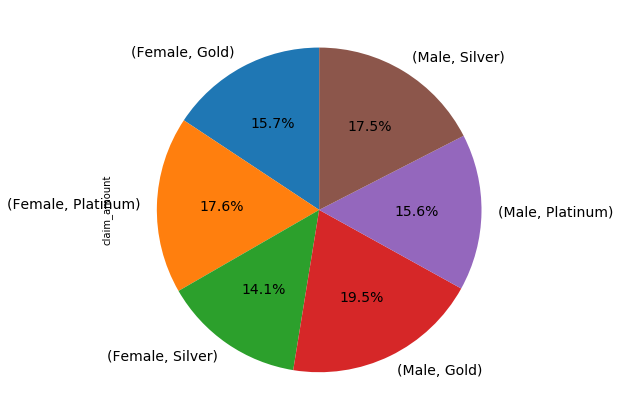

In [47]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
aggregated_value.plot(kind='pie', y = 'claim_amount' , ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)

### Problem No. 12:

###  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

In [48]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.000000,Adult


In [49]:
gender_claim = insurance_claims[(insurance_claims.incident_cause == 'Driver error') | (insurance_claims.incident_cause == 'Other driver error')]
gender_claim = gender_claim.groupby('gender').agg({'claim_amount' : 'sum'})
gender_claim

,claim_amount
gender,
Female,3137731.480750
Male,3938907.474827


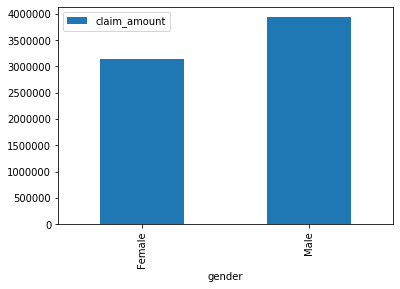

In [50]:
gender_claim.plot.bar()

### Note: As we can see in above Bar Chart Gender category 'Male' has claimed the most of any type of driver related issue.

### Problem No. 13:

###  Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart. 

In [51]:
insurance_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,0,42.000000,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.000000,1.000000,No,Female,1981-03-15 00:00:00,ND,459-425-4319,Platinum,0,38.000000,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.000000,1.000000,No,Female,1996-07-07 00:00:00,ID,529-462-1635,Silver,0,23.000000,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.000000,2.000000,No,Male,1990-04-11 00:00:00,WI,712-651-9613,Gold,0,29.000000,Youth
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.000000,4.000000,No,Female,1964-10-22 18:00:00,LA,469-345-5617,Silver,0,55.000000,Adult


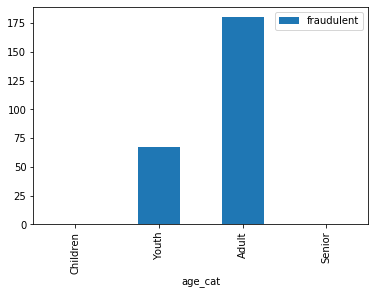

In [52]:
age_group = insurance_claims[insurance_claims.fraudulent == 'Yes']
age_group.groupby('age_cat').agg({'fraudulent': 'count'}).plot.bar()

### Problem No. 14:

### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [53]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.000000,Adult


In [54]:
claim_monthly_order = insurance_claims.sort_values('claim_date', ascending = False)
claim_monthly_order

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.000000,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,0,42.000000,Adult
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.000000,No,Female,1974-11-21 00:00:00,NV,186-195-3465,Gold,0,45.000000,Adult
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.000000,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,0,52.000000,Adult
751,25213498,28932340,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.000000,No,Male,1996-01-05 00:00:00,LA,652-265-8231,Gold,0,24.000000,Youth
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.000000,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,0,51.000000,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,70512964,22756942,Driver error,2017-01-01,Auto,Yes,Injury only,20310.000000,1.000000,No,Male,1982-10-09 00:00:00,FL,462-823-3126,Silver,0,37.000000,Adult
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.000000,Yes,Male,1965-01-10 18:00:00,LA,615-154-3516,Gold,0,55.000000,Adult
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.000000,No,Female,1994-07-24 00:00:00,MA,612-684-5472,Platinum,0,25.000000,Youth
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.000000,No,Female,1993-08-13 00:00:00,TN,396-973-2531,Gold,1,26.000000,Youth


In [55]:
claim_monthly_order = claim_monthly_order.set_index('claim_date')
claim_monthly_order

,claim_id,customer_id,incident_cause,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
claim_date,,,,,,,,,,,,,,,,,
2018-10-30,74761374,46710738,Driver error,Auto,No,Material only,1830.000000,1.000000,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,0,42.000000,Adult
2018-10-30,49735712,17682060,Crime,Home,Unknown,Material and injury,17020.000000,1.000000,No,Female,1974-11-21 00:00:00,NV,186-195-3465,Gold,0,45.000000,Adult
2018-10-30,99775483,93915431,Other causes,Auto,No,Material and injury,42124.500000,1.000000,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,0,52.000000,Adult
2018-10-30,25213498,28932340,Driver error,Auto,Unknown,Material only,12470.498519,1.000000,No,Male,1996-01-05 00:00:00,LA,652-265-8231,Gold,0,24.000000,Youth
2018-10-30,43042986,58451506,Natural causes,Auto,No,Material only,2420.000000,1.000000,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,0,51.000000,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,70512964,22756942,Driver error,Auto,Yes,Injury only,20310.000000,1.000000,No,Male,1982-10-09 00:00:00,FL,462-823-3126,Silver,0,37.000000,Adult
2017-01-01,39131766,39587790,Other causes,Auto,No,Material only,2967.000000,1.000000,Yes,Male,1965-01-10 18:00:00,LA,615-154-3516,Gold,0,55.000000,Adult
2017-01-01,90591192,61745840,Other driver error,Home,No,Material and injury,30930.000000,1.000000,No,Female,1994-07-24 00:00:00,MA,612-684-5472,Platinum,0,25.000000,Youth


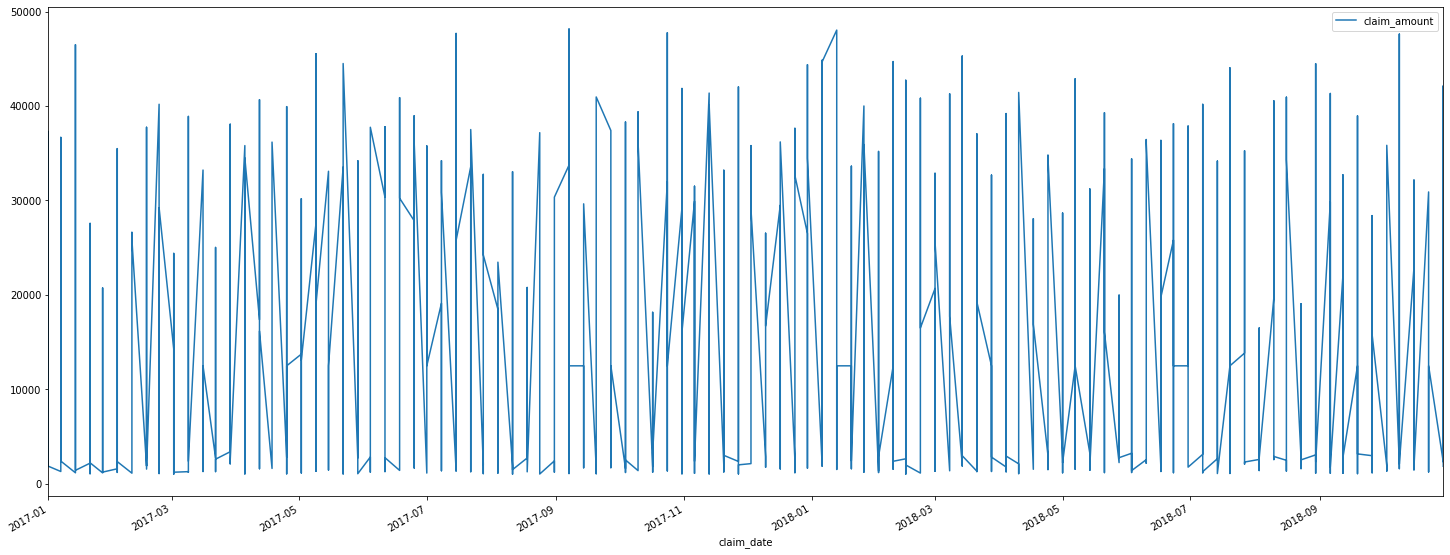

In [56]:
claim_monthly_order.plot(y = 'claim_amount',figsize = (25, 10))

### Problem No. 15:

### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 

In [57]:
insurance_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.000000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.000000,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.000000,No,Female,1970-01-13,ME,265-543-1264,Silver,0,50.000000,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.000000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,35.000000,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.000000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.000000,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.000000,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.000000,Adult


In [58]:
average_claim = insurance_claims.groupby(['gender', 'age_cat', 'fraudulent']).agg({'claim_amount': 'mean'})
average_claim = average_claim.reset_index()
average_claim

,gender,age_cat,fraudulent,claim_amount
0,Female,Children,No,nan
1,Female,Children,Yes,nan
2,Female,Youth,No,12850.108631
3,Female,Youth,Yes,8256.843565
4,Female,Adult,No,12254.919508
5,Female,Adult,Yes,12031.244586
6,Female,Senior,No,nan
7,Female,Senior,Yes,nan
8,Male,Children,No,nan
9,Male,Children,Yes,nan


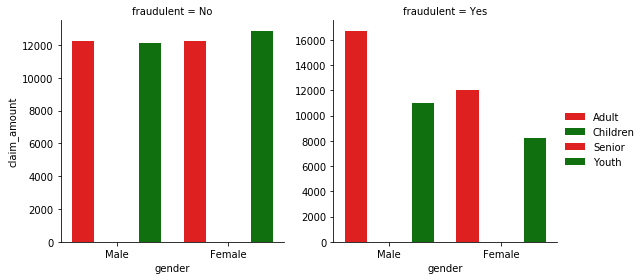

In [59]:
g = sns.FacetGrid(average_claim,
            col='fraudulent',
            sharex=False,
            sharey=False,
            height=4)
g = g.map(sns.barplot, 'gender', 'claim_amount', "age_cat", hue_order = np.unique(average_claim["age_cat"]),
         order = ["Male" , "Female"], palette = sns.color_palette(['red', 'green']))
g.add_legend()

plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### Problem No. 16:

###  Is there any similarity in the amount claimed by males and females? 

In [60]:
male = insurance_claims.claim_amount.loc[(insurance_claims.gender == 'Male')]
female = insurance_claims.claim_amount.loc[(insurance_claims.gender == 'Female')]

In [61]:
#H0: male == female claims
#H1: male <> female claims

In [62]:
from scipy import stats
stats.ttest_ind(a = male, b = female, equal_var = True)

Ttest_indResult(statistic=0.8848703612768547, pvalue=0.3764242430541366)

In [63]:
stats.ttest_ind(a = male, b = female, equal_var = False)

Ttest_indResult(statistic=0.8855042038952904, pvalue=0.3760826268637355)

In [64]:
# There is equal variance in male and female claims.
# There is no significant difference between amount claimed by males and females.
# p-value > alpha, we fail to reject Null Hypothesis.

### Problem No. 17:

### Is there any relationship between age category and segment?

In [65]:
# Testing the association between two categorical variable using Chi-Square Method:
t = pd.crosstab(insurance_claims.age_cat, insurance_claims.Segment)
t

Segment,Gold,Platinum,Silver
age_cat,,,
Youth,99,111,94
Adult,272,250,252


In [66]:
#H0: observed frequency = expected frequency
#H1: observed frequency <> expected frequency

In [67]:
stats.chi2_contingency(observed = t)

(1.7603323596976241,
 0.4147139888469801,
 2,
 array([[104.62337662, 101.80333952,  97.57328386],
        [266.37662338, 259.19666048, 248.42671614]]))

In [68]:
# Since, p-value is high so we will accept the Null Hypothesis.
# There is statistically no significant difference between observed frequency and expected frequency.
# The age category and segment are independent.

### Problem No. 18: 

### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [69]:
# H0 = $10,000  #1 sample t-test

In [70]:
stats.ttest_1samp(a = insurance_claims.claim_amount, popmean = 10000)

Ttest_1sampResult(statistic=6.068796577191384, pvalue=1.7827316562159517e-09)

In [71]:
insurance_claims.claim_amount.mean()

12470.498519249744

In [72]:
# As p-value is very low so we will reject the Null Hypothesis.
# There has been statistically significant rise in claim amounts around 24.7% as compared to 2016-17 fiscal average of $10,000

### Problem No. 19:

### Is there any difference between age groups and insurance claims?

In [73]:
# As age-groups can be more than 2 so we will use ANOVA test.

In [74]:
insurance_claims.age_cat.value_counts()

Adult       774
Youth       304
Senior        0
Children      0
Name: age_cat, dtype: int64

In [75]:
# Since, age category of Senior and Children has no data. So we will consider age groups Adult and Youth.
Adult = insurance_claims.claim_amount[insurance_claims.age_cat == 'Adult']
Youth = insurance_claims.claim_amount[insurance_claims.age_cat == 'Youth']

In [76]:
#H0: Adult = Youth = Senior = Children = Insurance Claims

In [77]:
stats.f_oneway(Adult, Youth)

F_onewayResult(statistic=0.9098449856792599, pvalue=0.3403697825966172)

In [78]:
insurance_claims.claim_amount.loc[insurance_claims.age_cat == 'Adult'].mean()

12713.859087036488

In [79]:
insurance_claims.claim_amount.loc[insurance_claims.age_cat == 'Youth'].mean()

11850.889705213798

In [80]:
# As p-value is high so we will accept the Null Hypothesis.
# There is statistically not significant difference between the insurance claim amount of different age groups.

### Problem No. 20:

### Is there any relationship between total number of policy claims and the claimed amount?

In [94]:
#H0: Total number of policy claims (for different groups based on total policy claims)= claim amount
#H1: total number of policy claims <> claim amount

In [87]:
insurance_claims.total_policy_claims.value_counts()

1.000000    781
2.000000    104
3.000000     86
4.000000     58
5.000000     27
1.582397     10
6.000000      9
7.000000      2
8.000000      1
Name: total_policy_claims, dtype: int64

In [88]:
insurance_claims.total_policy_claims.dtype

dtype('float64')

In [91]:
c1 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 1]
c2 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 2]
c3 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 3]
c4 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 4]
c5 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 5]
c6 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 6]
c7 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 7]
c8 = insurance_claims.claim_amount[insurance_claims.total_policy_claims == 8]

In [92]:
stats.f_oneway(c1,c2,c3,c4,c5,c6,c7,c8)

F_onewayResult(statistic=0.9303871958342094, pvalue=0.48182615228564063)

In [95]:
# As p-value is high, so we will accept Null Hypothesis.
# There is statistically not significant difference between the claim amount of different total number of policy claims.